### Import 10 year stock data of Mag-7 stocks using YFinance API

In [1]:
# Import libraries
import pandas as pd
import yfinance as yf
import datetime as dt
import numpy as np

# Define the tickers to get data for - Microsoft, Apple, Google, Meta, Amazon, Nvidia and Tesla
tickers = ['MSFT', 'AAPL', 'GOOGL', 'META', 'AMZN', 'NVDA', 'TSLA']

#Grab data from yfinance api

# #Set start and end date of data download
start_date = "2014-09-01"
end_date = "2024-08-31"



# # Define function to get stock price history
def get_stock_data(ticker):
     stock = yf.Ticker(ticker)
     df = stock.history(start=start_date, end=end_date, interval='1d')
     return df[['Open', 'Close', 'High', 'Low']]

# # Get stock price history for all the stocks in all_data dataframe
all_data = {ticker: get_stock_data(ticker) for ticker in tickers}

# # Combine all data into a single DataFrame
final_df_stock_prices = pd.concat(all_data, axis=1)
final_df_stock_prices.columns = pd.MultiIndex.from_product([tickers, ['Open', 'Close', 'High', 'Low']])

# Display the first few rows of the data
final_df_stock_prices.head()

MSFT                                   \
                                Open      Close       High        Low   
Date                                                                    
2014-09-02 00:00:00-04:00  38.765918  38.475792  38.791516  38.270996   
2014-09-03 00:00:00-04:00  37.997940  38.364864  38.492862  37.997940   
2014-09-04 00:00:00-04:00  38.177131  38.620850  38.629385  38.160064   
2014-09-05 00:00:00-04:00  38.492870  39.175518  39.192585  38.492870   
2014-09-08 00:00:00-04:00  39.269368  39.653358  39.934949  39.243770   

                                AAPL                                   \
                                Open      Close       High        Low   
Date                                                                    
2014-09-02 00:00:00-04:00  22.851785  22.905003  23.002564  22.776397   
2014-09-03 00:00:00-04:00  22.860655  21.938248  22.882828  21.858424   
2014-09-04 00:00:00-04:00  21.918288  21.756424  22.193236  21.683252   
2014-09-05 00:00:00-04:00  21.907208  21.944902  22.038030  21.798558   
2014-09-08 00:00:00-04:00  22.018076  21.809647  22.020292  21.740910   

                               GOOGL             ...       AMZN             \
                                Open      Close  ...       High        Low   
Date                                             ...                         
2014-09-02 00:00:00-04:00  29.042219  29.325193  ...  17.125000  16.858000   
2014-09-03 00:00:00-04:00  29.479635  29.369534  ...  17.163500  16.877501   
2014-09-04 00:00:00-04:00  29.499563  29.549879  ...  17.469000  17.179001   
2014-09-05 00:00:00-04:00  29.649021  29.781042  ...  17.341499  17.125000   
2014-09-08 00:00:00-04:00  29.848796  29.972845  ...  17.290501  16.952000   

                               NVDA                                     TSLA  \
                               Open     Close      High       Low       Open   
Date                                                                           
2014-09-02 00:00:00-04:00  0.466051  0.466051  0.466051  0.461748  18.366667   
2014-09-03 00:00:00-04:00  0.468440  0.470352  0.472025  0.465333  19.177999   
2014-09-04 00:00:00-04:00  0.469635  0.478717  0.481585  0.469396  18.934000   
2014-09-05 00:00:00-04:00  0.478239  0.477283  0.480390  0.474176  18.836666   
2014-09-08 00:00:00-04:00  0.476805  0.472981  0.477761  0.471069  18.507999   

                                                            
                               Close       High        Low  
Date                                                        
2014-09-02 00:00:00-04:00  18.941334  18.992666  18.286667  
2014-09-03 00:00:00-04:00  18.746000  19.200001  18.673332  
2014-09-04 00:00:00-04:00  19.069332  19.427999  18.693333  
2014-09-05 00:00:00-04:00  18.492666  18.860001  18.167334  
2014-09-08 00:00:00-04:00  18.807333  18.992001  18.501333  

[5 rows x 28 columns]

### Get Macroeconomic indicators' data for the last 10 years from FRED API using an obtained API key

In [2]:
#import libraries
from fredapi import Fred
import streamlit as st

# Disable SSL to get the data
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# Your FRED API key
fred = Fred(api_key=st.secrets["API_KEY"])

# Get historical GDP (Gross Domestic Product) data
gdp = fred.get_series('GDP', observation_start='2014-09-01')

# Get historical inflation data (CPI - Consumer Price Index)
inflation = fred.get_series('CPIAUCSL', observation_start='2014-09-01')

# Get historical unemployment rate data
unemployment = fred.get_series('UNRATE', observation_start='2014-09-01')

# Get historical data for Retail Sales
retail_sales = fred.get_series('RSAFSNA', observation_start='2014-09-01')

# Get historical data for Industrial Production (Index)
industrial_production = fred.get_series('INDPRO', observation_start='2014-09-01')

# Fetch Monthly Real GDP Index
gdp_data = fred.get_series('A191RL1Q225SBEA', observation_start='2014-06-30')

# Convert to DataFrame
gdp_df = pd.DataFrame(gdp_data, columns=['Real GDP Index'])

# Calculate Monthly GDP Growth (approximation)
gdp_df['GDP Growth (%)'] = gdp_df['Real GDP Index'].pct_change() * 100


# Create a DataFrame to store the data
macro_economic_data = pd.DataFrame({
    'GDP Growth': gdp_df['GDP Growth (%)'],
    'Inflation (CPI)': inflation,
    'Unemployment Rate': unemployment,
    'Retail Sales': retail_sales,
    'Industrial Production': industrial_production
})

#Forward fill missing data
macro_economic_data = macro_economic_data.fillna(method='ffill')

# Display the first few rows of the data
print(macro_economic_data.head())

            GDP Growth  Inflation (CPI)  Unemployment Rate  Retail Sales  \
2014-04-01         NaN              NaN                NaN           NaN   
2014-07-01   -5.660377              NaN                NaN           NaN   
2014-09-01   -5.660377          237.477                5.9      421522.0   
2014-10-01  -60.000000          237.430                5.7      438593.0   
2014-11-01  -60.000000          236.983                5.8      439188.0   

            Industrial Production  
2014-04-01                    NaN  
2014-07-01                    NaN  
2014-09-01               102.9417  
2014-10-01               102.9611  
2014-11-01               103.5978  


/var/folders/g4/bfysrxr16pggxpcblkn5x7z80000gn/T/ipykernel_22629/1054849969.py:48: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  macro_economic_data = macro_economic_data.fillna(method='ffill')


In [3]:
# Get rid of unneeded rows
economic_data_needed = macro_economic_data.iloc[2:,:]
economic_data_needed.head()

,GDP Growth,Inflation (CPI),Unemployment Rate,Retail Sales,Industrial Production
2014-09-01,-5.660377,237.477,5.9,421522.0,102.9417
2014-10-01,-60.000000,237.430,5.7,438593.0,102.9611
2014-11-01,-60.000000,236.983,5.8,439188.0,103.5978
2014-12-01,-60.000000,236.252,5.6,501950.0,103.6151
2015-01-01,80.000000,234.747,5.7,398394.0,102.7923


In [4]:
#Convert to daily data from monthly data
economic_data_needed.index = economic_data_needed.index.to_period('M')
economic_data_needed = economic_data_needed.resample('D').ffill()
economic_data_needed.head()

,GDP Growth,Inflation (CPI),Unemployment Rate,Retail Sales,Industrial Production
2014-09-01,-5.660377,237.477,5.9,421522.0,102.9417
2014-09-02,-5.660377,237.477,5.9,421522.0,102.9417
2014-09-03,-5.660377,237.477,5.9,421522.0,102.9417
2014-09-04,-5.660377,237.477,5.9,421522.0,102.9417
2014-09-05,-5.660377,237.477,5.9,421522.0,102.9417


### Merge macroeconmic indicator data with stock price data

In [5]:
# Converge indexes before merging
final_df_stock_prices.reset_index(inplace=True)
final_df_stock_prices['Date'] = final_df_stock_prices['Date'].astype("string").str[0:10]
final_df_stock_prices = final_df_stock_prices.set_index('Date', drop=True)

final_df_stock_prices.index = final_df_stock_prices.index.astype('str')
economic_data_needed.index = economic_data_needed.index.astype('str')

# Add multilevel index just as in stock price data before merging
economic_data_needed.columns = pd.MultiIndex.from_product([['Macroeconomic'], economic_data_needed.columns])

#Merge dataframes
economic_data_needed = economic_data_needed.merge(final_df_stock_prices,how="left", left_index=True, right_index=True)

economic_data_needed.index = pd.to_datetime(economic_data_needed.index)

economic_data_needed.head()

Macroeconomic                                                 \
              GDP Growth Inflation (CPI) Unemployment Rate Retail Sales   
2014-09-01     -5.660377         237.477               5.9     421522.0   
2014-09-02     -5.660377         237.477               5.9     421522.0   
2014-09-03     -5.660377         237.477               5.9     421522.0   
2014-09-04     -5.660377         237.477               5.9     421522.0   
2014-09-05     -5.660377         237.477               5.9     421522.0   

                                       MSFT                                   \
           Industrial Production       Open      Close       High        Low   
2014-09-01              102.9417        NaN        NaN        NaN        NaN   
2014-09-02              102.9417  38.765918  38.475792  38.791516  38.270996   
2014-09-03              102.9417  37.997940  38.364864  38.492862  37.997940   
2014-09-04              102.9417  38.177131  38.620850  38.629385  38.160064   
2014-09-05              102.9417  38.492870  39.175518  39.192585  38.492870   

                 AAPL  ...       AMZN                 NVDA            \
                 Open  ...       High        Low      Open     Close   
2014-09-01        NaN  ...        NaN        NaN       NaN       NaN   
2014-09-02  22.851785  ...  17.125000  16.858000  0.466051  0.466051   
2014-09-03  22.860655  ...  17.163500  16.877501  0.468440  0.470352   
2014-09-04  21.918288  ...  17.469000  17.179001  0.469635  0.478717   
2014-09-05  21.907208  ...  17.341499  17.125000  0.478239  0.477283   

                                     TSLA                                   
                High       Low       Open      Close       High        Low  
2014-09-01       NaN       NaN        NaN        NaN        NaN        NaN  
2014-09-02  0.466051  0.461748  18.366667  18.941334  18.992666  18.286667  
2014-09-03  0.472025  0.465333  19.177999  18.746000  19.200001  18.673332  
2014-09-04  0.481585  0.469396  18.934000  19.069332  19.427999  18.693333  
2014-09-05  0.480390  0.474176  18.836666  18.492666  18.860001  18.167334  

[5 rows x 33 columns]

### Create a copy of the DataFrame for processing

In [6]:
final_stocks_df = economic_data_needed.copy()
final_stocks_df.head()

Macroeconomic                                                 \
              GDP Growth Inflation (CPI) Unemployment Rate Retail Sales   
2014-09-01     -5.660377         237.477               5.9     421522.0   
2014-09-02     -5.660377         237.477               5.9     421522.0   
2014-09-03     -5.660377         237.477               5.9     421522.0   
2014-09-04     -5.660377         237.477               5.9     421522.0   
2014-09-05     -5.660377         237.477               5.9     421522.0   

                                       MSFT                                   \
           Industrial Production       Open      Close       High        Low   
2014-09-01              102.9417        NaN        NaN        NaN        NaN   
2014-09-02              102.9417  38.765918  38.475792  38.791516  38.270996   
2014-09-03              102.9417  37.997940  38.364864  38.492862  37.997940   
2014-09-04              102.9417  38.177131  38.620850  38.629385  38.160064   
2014-09-05              102.9417  38.492870  39.175518  39.192585  38.492870   

                 AAPL  ...       AMZN                 NVDA            \
                 Open  ...       High        Low      Open     Close   
2014-09-01        NaN  ...        NaN        NaN       NaN       NaN   
2014-09-02  22.851785  ...  17.125000  16.858000  0.466051  0.466051   
2014-09-03  22.860655  ...  17.163500  16.877501  0.468440  0.470352   
2014-09-04  21.918288  ...  17.469000  17.179001  0.469635  0.478717   
2014-09-05  21.907208  ...  17.341499  17.125000  0.478239  0.477283   

                                     TSLA                                   
                High       Low       Open      Close       High        Low  
2014-09-01       NaN       NaN        NaN        NaN        NaN        NaN  
2014-09-02  0.466051  0.461748  18.366667  18.941334  18.992666  18.286667  
2014-09-03  0.472025  0.465333  19.177999  18.746000  19.200001  18.673332  
2014-09-04  0.481585  0.469396  18.934000  19.069332  19.427999  18.693333  
2014-09-05  0.480390  0.474176  18.836666  18.492666  18.860001  18.167334  

[5 rows x 33 columns]

In [7]:
# Drop NAN rows
final_stocks_df = final_stocks_df.dropna()
final_stocks_df.head()

Macroeconomic                                                 \
              GDP Growth Inflation (CPI) Unemployment Rate Retail Sales   
2014-09-02     -5.660377         237.477               5.9     421522.0   
2014-09-03     -5.660377         237.477               5.9     421522.0   
2014-09-04     -5.660377         237.477               5.9     421522.0   
2014-09-05     -5.660377         237.477               5.9     421522.0   
2014-09-08     -5.660377         237.477               5.9     421522.0   

                                       MSFT                                   \
           Industrial Production       Open      Close       High        Low   
2014-09-02              102.9417  38.765918  38.475792  38.791516  38.270996   
2014-09-03              102.9417  37.997940  38.364864  38.492862  37.997940   
2014-09-04              102.9417  38.177131  38.620850  38.629385  38.160064   
2014-09-05              102.9417  38.492870  39.175518  39.192585  38.492870   
2014-09-08              102.9417  39.269368  39.653358  39.934949  39.243770   

                 AAPL  ...       AMZN                 NVDA            \
                 Open  ...       High        Low      Open     Close   
2014-09-02  22.851785  ...  17.125000  16.858000  0.466051  0.466051   
2014-09-03  22.860655  ...  17.163500  16.877501  0.468440  0.470352   
2014-09-04  21.918288  ...  17.469000  17.179001  0.469635  0.478717   
2014-09-05  21.907208  ...  17.341499  17.125000  0.478239  0.477283   
2014-09-08  22.018076  ...  17.290501  16.952000  0.476805  0.472981   

                                     TSLA                                   
                High       Low       Open      Close       High        Low  
2014-09-02  0.466051  0.461748  18.366667  18.941334  18.992666  18.286667  
2014-09-03  0.472025  0.465333  19.177999  18.746000  19.200001  18.673332  
2014-09-04  0.481585  0.469396  18.934000  19.069332  19.427999  18.693333  
2014-09-05  0.480390  0.474176  18.836666  18.492666  18.860001  18.167334  
2014-09-08  0.477761  0.471069  18.507999  18.807333  18.992001  18.501333  

[5 rows x 33 columns]

### Get NVIDIA Stock Price Close Data with macroeconomic data for EDA by dropping other stocks

In [8]:
final_df_nvidia = final_stocks_df.drop(['MSFT', 'AAPL', 'GOOGL', 'META', 'AMZN', 'TSLA'], axis=1, level=0)
final_df_nvidia_close = final_df_nvidia.drop(['Open', 'High', 'Low'], axis=1, level=1)
final_df_nvidia_close.head()

Macroeconomic                                                 \
              GDP Growth Inflation (CPI) Unemployment Rate Retail Sales   
2014-09-02     -5.660377         237.477               5.9     421522.0   
2014-09-03     -5.660377         237.477               5.9     421522.0   
2014-09-04     -5.660377         237.477               5.9     421522.0   
2014-09-05     -5.660377         237.477               5.9     421522.0   
2014-09-08     -5.660377         237.477               5.9     421522.0   

                                      NVDA  
           Industrial Production     Close  
2014-09-02              102.9417  0.466051  
2014-09-03              102.9417  0.470352  
2014-09-04              102.9417  0.478717  
2014-09-05              102.9417  0.477283  
2014-09-08              102.9417  0.472981

In [9]:
# Drop extra level in the columns
final_df_nvidia_close.columns = final_df_nvidia_close.columns.droplevel()
final_df_nvidia_close = final_df_nvidia_close.rename(columns={'Close': 'NVIDIA_Close'})
final_df_nvidia_close.head()

,GDP Growth,Inflation (CPI),Unemployment Rate,Retail Sales,Industrial Production,NVIDIA_Close
2014-09-02,-5.660377,237.477,5.9,421522.0,102.9417,0.466051
2014-09-03,-5.660377,237.477,5.9,421522.0,102.9417,0.470352
2014-09-04,-5.660377,237.477,5.9,421522.0,102.9417,0.478717
2014-09-05,-5.660377,237.477,5.9,421522.0,102.9417,0.477283
2014-09-08,-5.660377,237.477,5.9,421522.0,102.9417,0.472981


### Get NVIDIA EPS AND PE data from Macrotrends website's saved html page

In [10]:
import pandas as pd

url_pe = '../data/' + 'NVDA' + '_PE_Ratio.html'
url_eps = '../data/' + 'NVDA' + '_EPS.html'

# Use pandas to read tables on the webpages
table_pe = pd.read_html(url_pe)
tables_eps = pd.read_html(url_eps)

# Select the first table from the list (index 0)
df_pe = table_pe[0]
df_eps = tables_eps[1]

#Drop extra column index level, set index as date and drop extra columns
df_pe = df_pe.droplevel(0, axis =1)
df_pe.set_index(df_pe.columns[0], inplace=True)
df_pe.drop(axis=1, columns=["Stock Price", "TTM Net EPS"], inplace=True)
df_pe.index = pd.to_datetime(df_pe.index)

df_eps = df_eps.rename(columns={df_eps.columns[0]: 'Date', df_eps.columns[1]: 'Quarterly EPS'})
df_eps.set_index(df_eps.columns[0], inplace=True)
df_eps.index = pd.to_datetime(df_eps.index)

print(df_eps)
df_pe.head()

           Quarterly EPS
Date                    
2024-10-31         $0.78
2024-07-31         $0.67
2024-04-30         $0.60
2024-01-31         $0.49
2023-10-31         $0.37
...                  ...
2010-01-31         $0.01
2009-10-31         $0.01
2009-07-31        $-0.01
2009-04-30        $-0.01
2009-01-31        $-0.01

[64 rows x 1 columns]


,PE Ratio
Date,
2025-01-24,56.13
2024-10-31,52.24
2024-07-31,54.88
2024-04-30,50.52
2024-01-31,51.52


### Merge PE and EPS data with the NVIDIA stock price data

In [11]:
final_df_nvidia_close = final_df_nvidia_close.merge(df_pe, how='left', left_index = True, right_index = True)
final_df_nvidia_close = final_df_nvidia_close.merge(df_eps, how='left', left_index = True, right_index = True)

final_df_nvidia_close['PE Ratio'].iloc[0] = df_pe.loc['2014-07-31']
final_df_nvidia_close['PE Ratio'] = final_df_nvidia_close['PE Ratio'].fillna(method="ffill")

final_df_nvidia_close['Quarterly EPS'].iloc[0] = df_eps.loc['2014-07-31', 'Quarterly EPS']
final_df_nvidia_close['Quarterly EPS'] = final_df_nvidia_close['Quarterly EPS'].fillna(method="ffill")

final_df_nvidia_close['Quarterly EPS'] = final_df_nvidia_close['Quarterly EPS'].str.replace('$', '')

final_df_nvidia_close.head()

/var/folders/g4/bfysrxr16pggxpcblkn5x7z80000gn/T/ipykernel_22629/662185951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_nvidia_close['PE Ratio'].iloc[0] = df_pe.loc['2014-07-31']
/var/folders/g4/bfysrxr16pggxpcblkn5x7z80000gn/T/ipykernel_22629/662185951.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df_nvidia_close['PE Ratio'] = final_df_nvidia_close['PE Ratio'].fillna(method="ffill")
/var/folders/g4/bfysrxr16pggxpcblkn5x7z80000gn/T/ipykernel_22629/662185951.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,GDP Growth,Inflation (CPI),Unemployment Rate,Retail Sales,Industrial Production,NVIDIA_Close,PE Ratio,Quarterly EPS
2014-09-02,-5.660377,237.477,5.9,421522.0,102.9417,0.466051,18.29,0.01
2014-09-03,-5.660377,237.477,5.9,421522.0,102.9417,0.470352,18.29,0.01
2014-09-04,-5.660377,237.477,5.9,421522.0,102.9417,0.478717,18.29,0.01
2014-09-05,-5.660377,237.477,5.9,421522.0,102.9417,0.477283,18.29,0.01
2014-09-08,-5.660377,237.477,5.9,421522.0,102.9417,0.472981,18.29,0.01


### Calculate and add Rolling Mean and Std Dev to the dataframe

In [12]:
final_df_nvidia_close['Rolling Mean'] = final_df_nvidia_close['NVIDIA_Close'].rolling(window=30).mean()
final_df_nvidia_close['Rolling Std'] = final_df_nvidia_close['NVIDIA_Close'].rolling(window=30).std()

In [13]:
# Convert "NVDIA_Close" to "float" from "string" for visualizations
final_df_nvidia_close['NVIDIA_Close'] = final_df_nvidia_close['NVIDIA_Close'].astype(np.dtype("float32"))
final_df_nvidia_close.head()

,GDP Growth,Inflation (CPI),Unemployment Rate,Retail Sales,Industrial Production,NVIDIA_Close,PE Ratio,Quarterly EPS,Rolling Mean,Rolling Std
2014-09-02,-5.660377,237.477,5.9,421522.0,102.9417,0.466051,18.29,0.01,NaN,NaN
2014-09-03,-5.660377,237.477,5.9,421522.0,102.9417,0.470352,18.29,0.01,NaN,NaN
2014-09-04,-5.660377,237.477,5.9,421522.0,102.9417,0.478717,18.29,0.01,NaN,NaN
2014-09-05,-5.660377,237.477,5.9,421522.0,102.9417,0.477283,18.29,0.01,NaN,NaN
2014-09-08,-5.660377,237.477,5.9,421522.0,102.9417,0.472981,18.29,0.01,NaN,NaN


### Add lagged indicators to the dataframe to be able to predict future stock prices

In [14]:
final_df_nvidia_close['Lagged_GDP'] = final_df_nvidia_close['GDP Growth'].shift(21)
final_df_nvidia_close['Lagged_Inflation'] = final_df_nvidia_close['Inflation (CPI)'].shift(21)
final_df_nvidia_close['Lagged_Unemp_rate'] = final_df_nvidia_close['Unemployment Rate'].shift(21)
final_df_nvidia_close['Lagged_Retail_Sales'] = final_df_nvidia_close['Retail Sales'].shift(21)
final_df_nvidia_close['Lagged_Industrial_prod'] = final_df_nvidia_close['Industrial Production'].shift(21)
final_df_nvidia_close['Lagged_PE'] = final_df_nvidia_close['PE Ratio'].shift(21)
final_df_nvidia_close['Lagged_EPS'] = final_df_nvidia_close['Quarterly EPS'].shift(21)
final_df_nvidia_close.head()

,GDP Growth,Inflation (CPI),Unemployment Rate,Retail Sales,Industrial Production,NVIDIA_Close,PE Ratio,Quarterly EPS,Rolling Mean,Rolling Std,Lagged_GDP,Lagged_Inflation,Lagged_Unemp_rate,Lagged_Retail_Sales,Lagged_Industrial_prod,Lagged_PE,Lagged_EPS
2014-09-02,-5.660377,237.477,5.9,421522.0,102.9417,0.466051,18.29,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2014-09-03,-5.660377,237.477,5.9,421522.0,102.9417,0.470352,18.29,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2014-09-04,-5.660377,237.477,5.9,421522.0,102.9417,0.478717,18.29,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2014-09-05,-5.660377,237.477,5.9,421522.0,102.9417,0.477283,18.29,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2014-09-08,-5.660377,237.477,5.9,421522.0,102.9417,0.472981,18.29,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


### Add Lagged Rolling Mean and Std Dev.

In [15]:
final_df_nvidia_close['Lagged_Rolling_Mean'] = final_df_nvidia_close['Rolling Mean'].shift(21)
final_df_nvidia_close['Lagged_Rolling_Std'] = final_df_nvidia_close['Rolling Std'].shift(21)

### Drop the first month of data which has 'NA' for lagged indicators

In [16]:
final_df_nvidia_close = final_df_nvidia_close.dropna()
final_df_nvidia_close.head()

,GDP Growth,Inflation (CPI),Unemployment Rate,Retail Sales,Industrial Production,NVIDIA_Close,PE Ratio,Quarterly EPS,Rolling Mean,Rolling Std,Lagged_GDP,Lagged_Inflation,Lagged_Unemp_rate,Lagged_Retail_Sales,Lagged_Industrial_prod,Lagged_PE,Lagged_EPS,Lagged_Rolling_Mean,Lagged_Rolling_Std
2014-11-11,-60.0,236.983,5.8,439188.0,103.5978,0.472743,18.27,0.01,0.442142,0.024451,-60.0,237.43,5.7,438593.0,102.9611,18.29,0.01,0.448938,0.019356
2014-11-12,-60.0,236.983,5.8,439188.0,103.5978,0.469635,18.27,0.01,0.443242,0.024933,-60.0,237.43,5.7,438593.0,102.9611,18.29,0.01,0.447090,0.020290
2014-11-13,-60.0,236.983,5.8,439188.0,103.5978,0.467245,18.27,0.01,0.444325,0.025255,-60.0,237.43,5.7,438593.0,102.9611,18.29,0.01,0.445305,0.020526
2014-11-14,-60.0,236.983,5.8,439188.0,103.5978,0.472981,18.27,0.01,0.445568,0.025728,-60.0,237.43,5.7,438593.0,102.9611,18.29,0.01,0.443250,0.020149
2014-11-17,-60.0,236.983,5.8,439188.0,103.5978,0.470830,18.27,0.01,0.446827,0.026018,-60.0,237.43,5.7,438593.0,102.9611,18.29,0.01,0.441218,0.019666


### Draw visualizations

/opt/anaconda3/envs/rohit-capstone-env/lib/python3.11/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


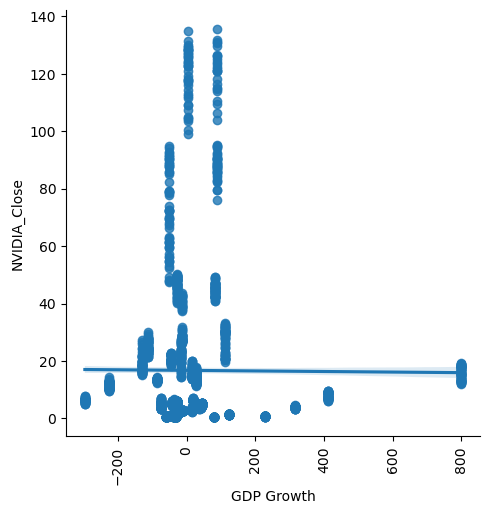

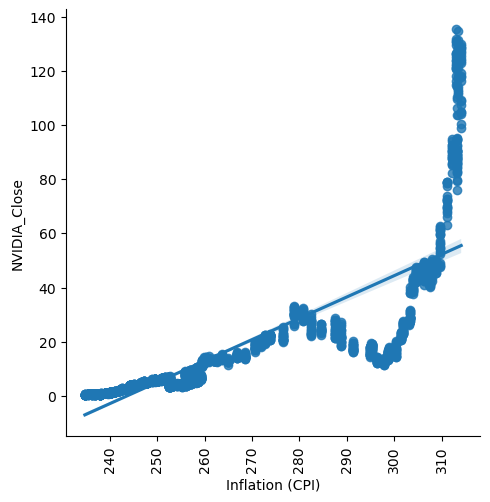

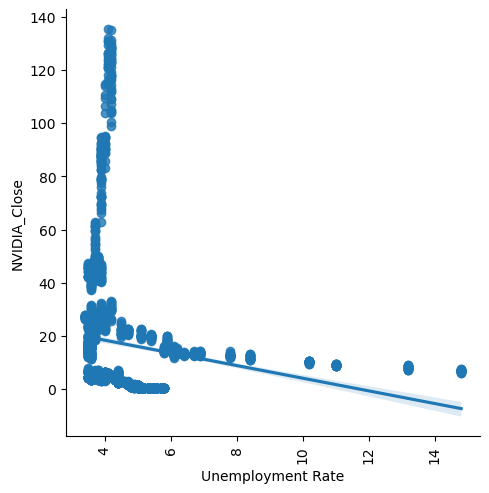

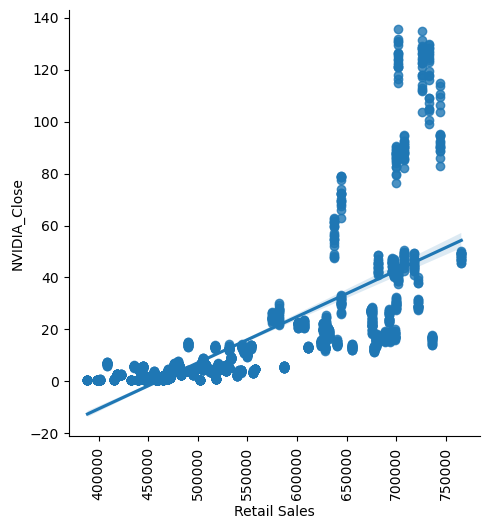

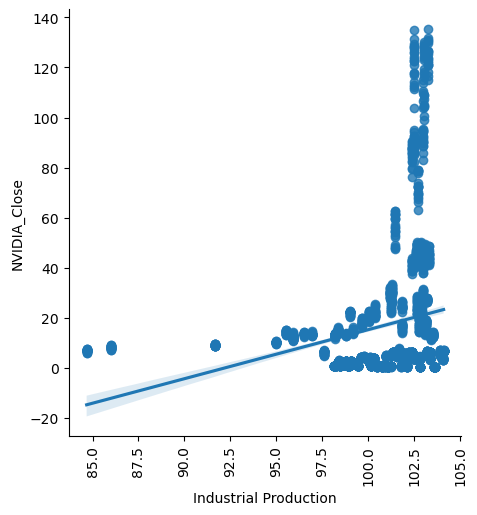

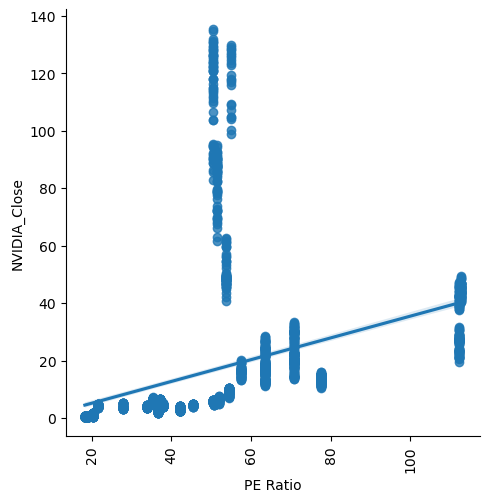

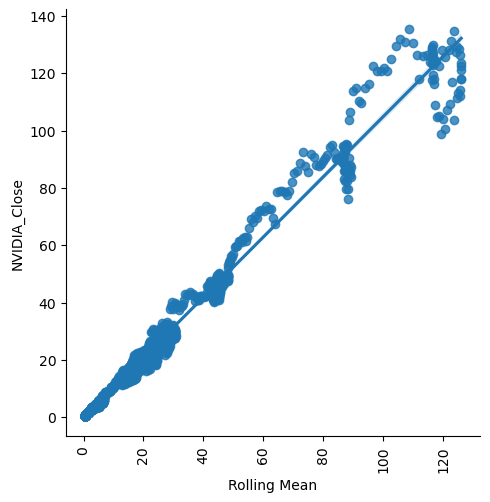

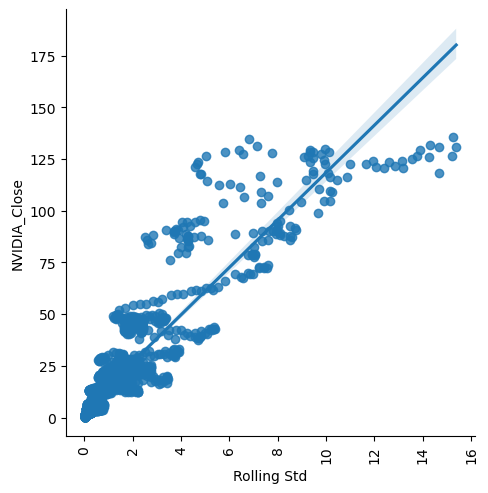

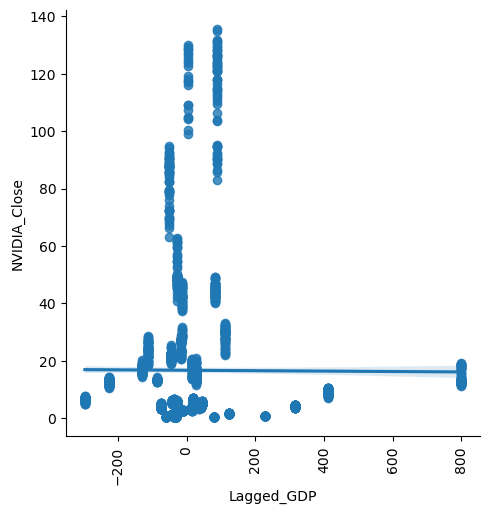

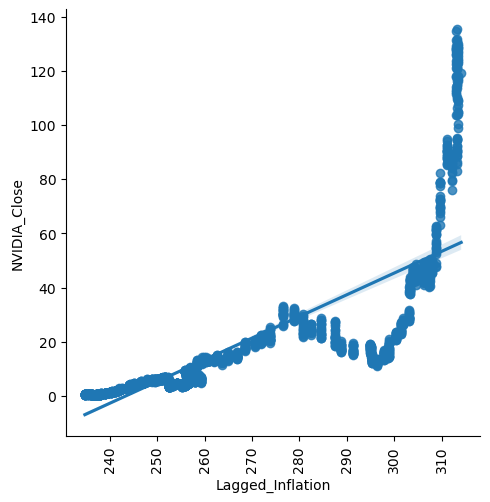

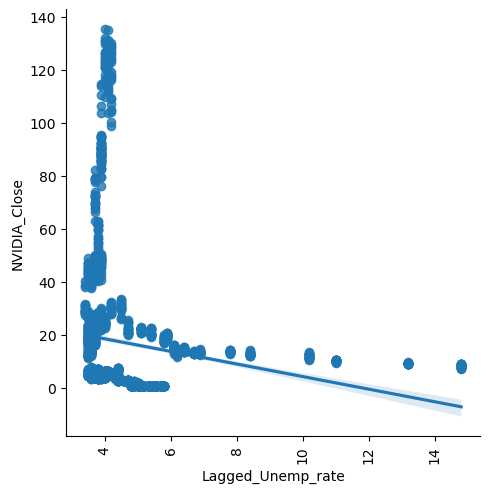

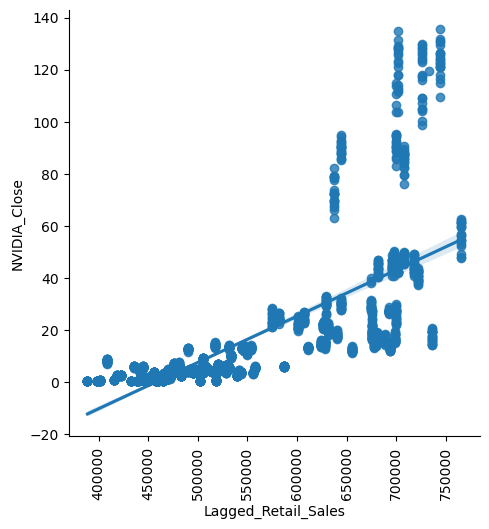

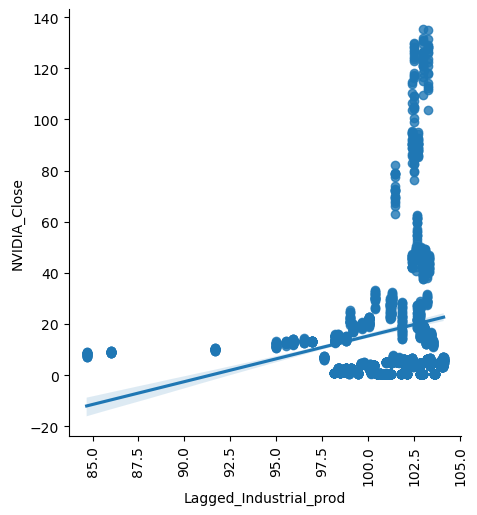

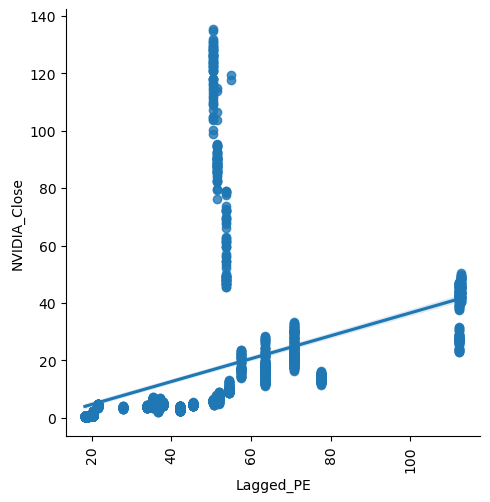

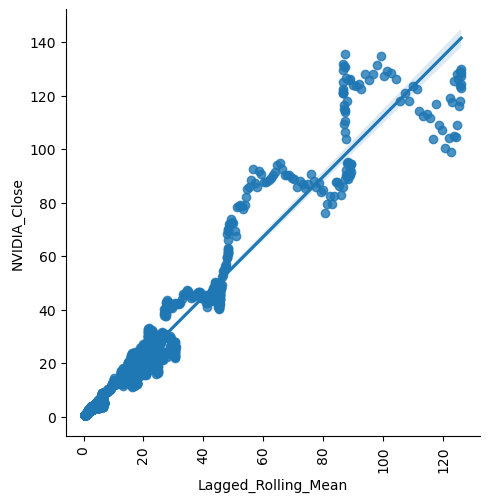

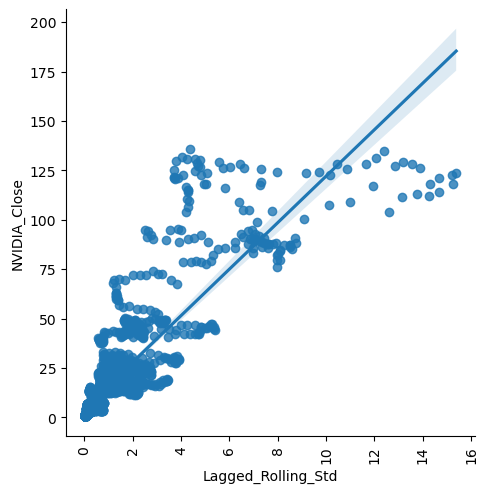

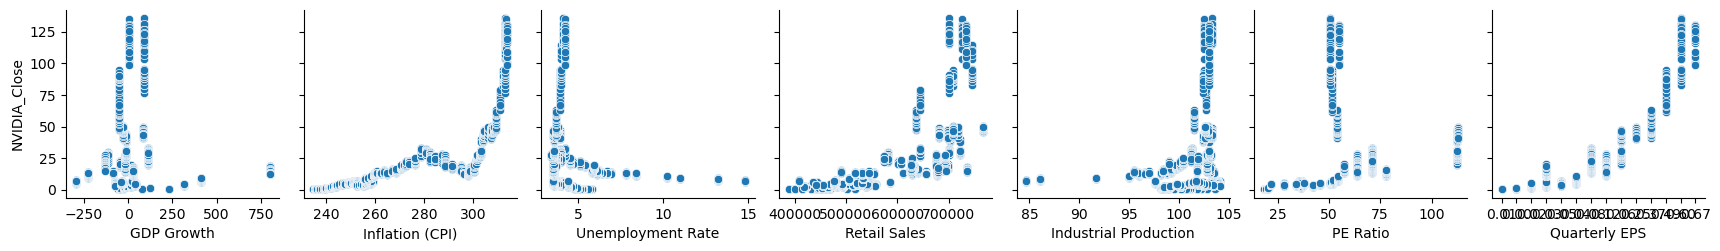

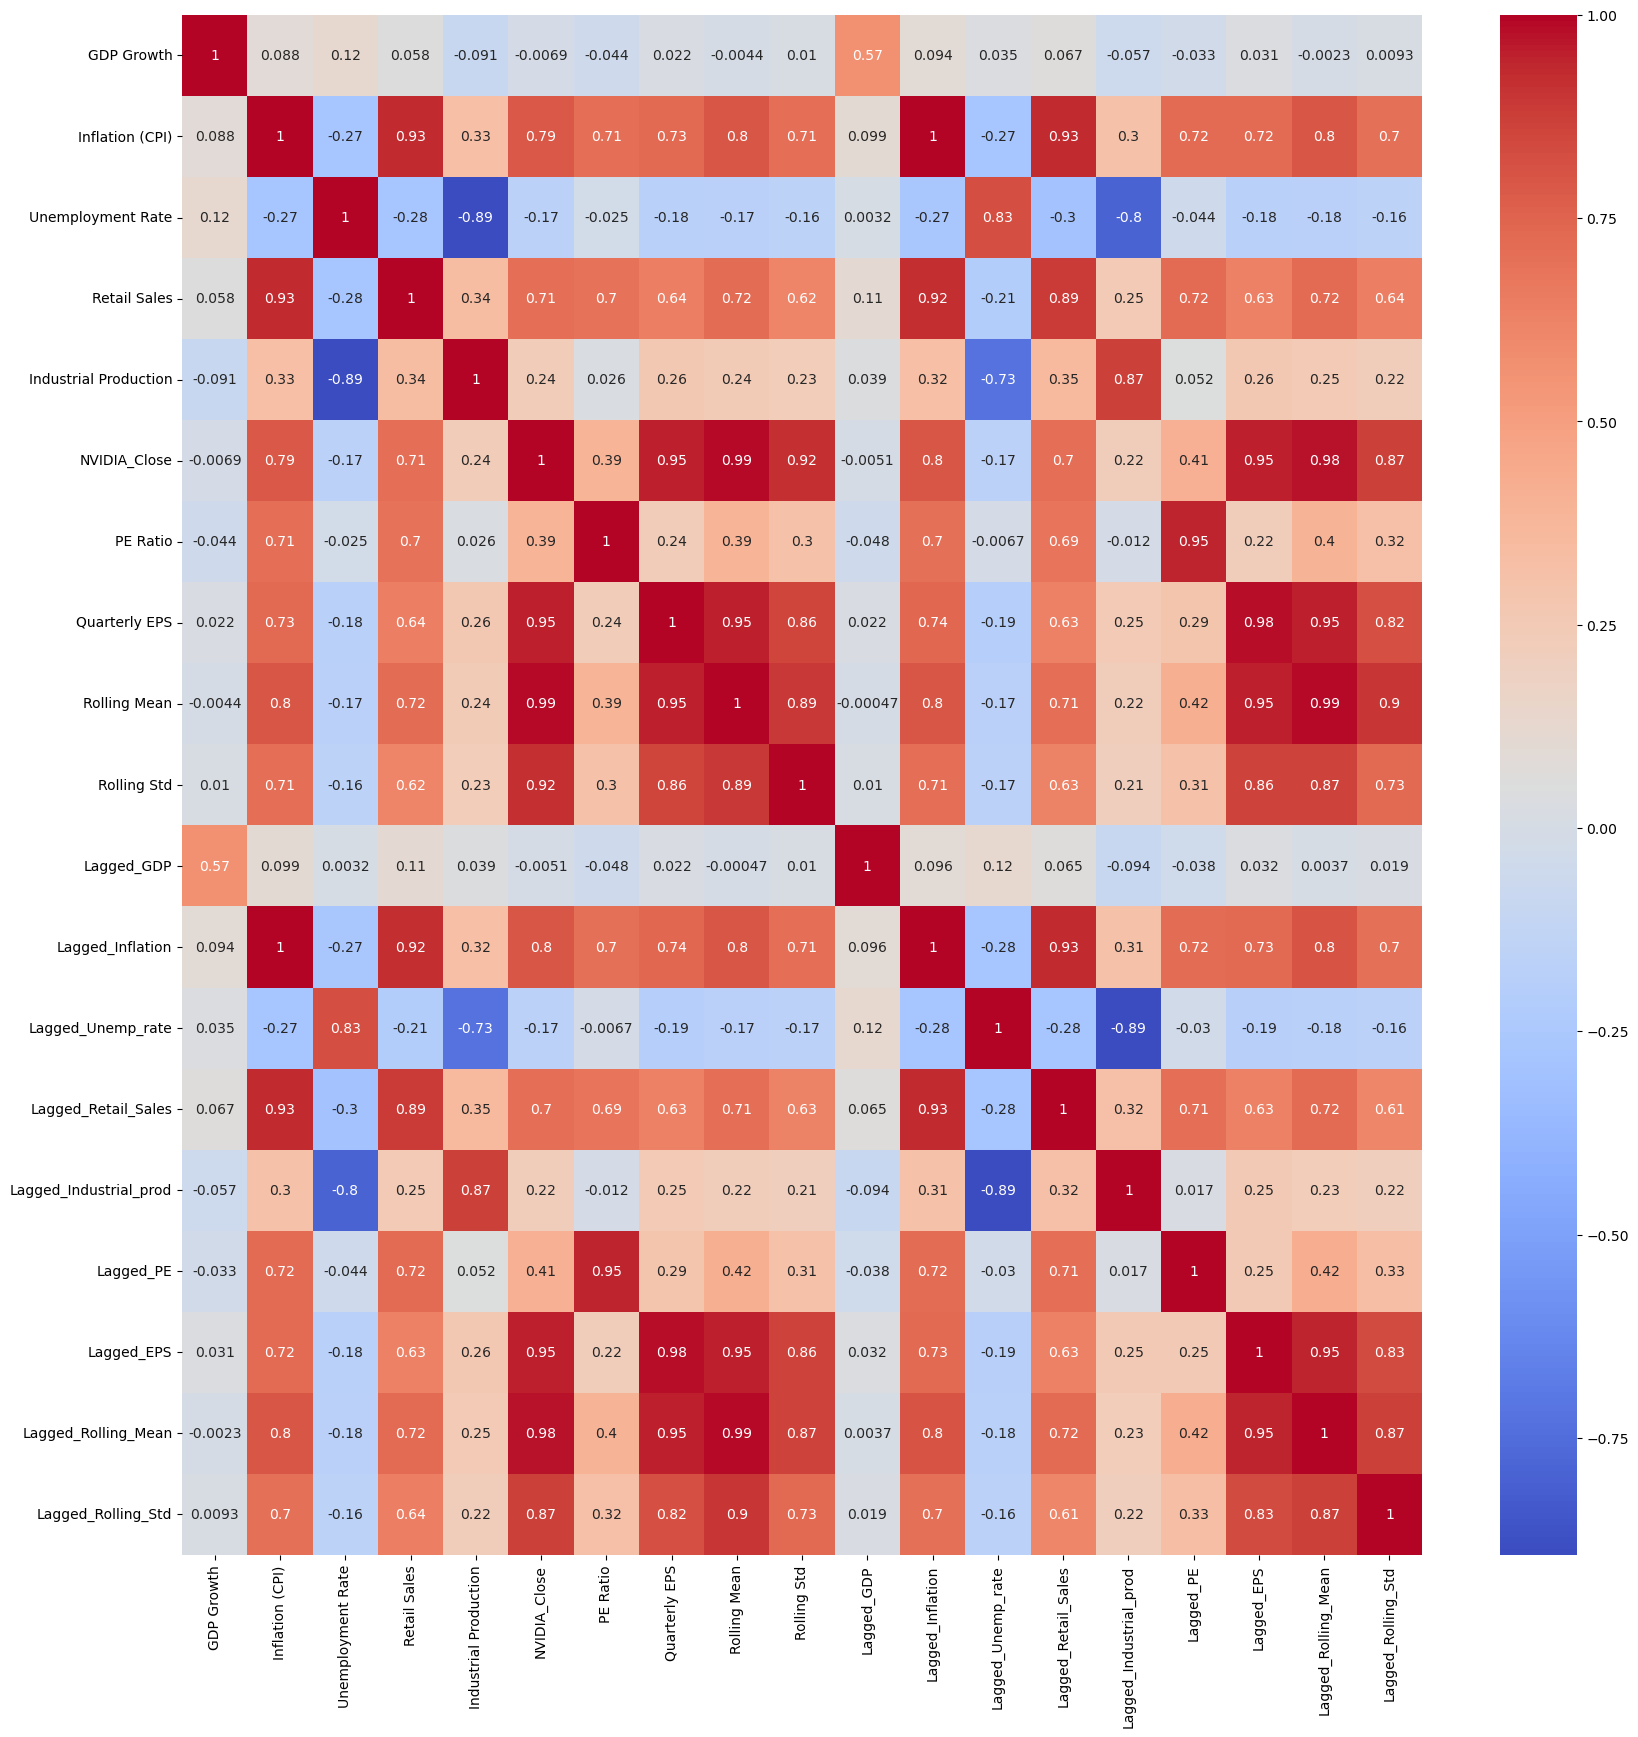

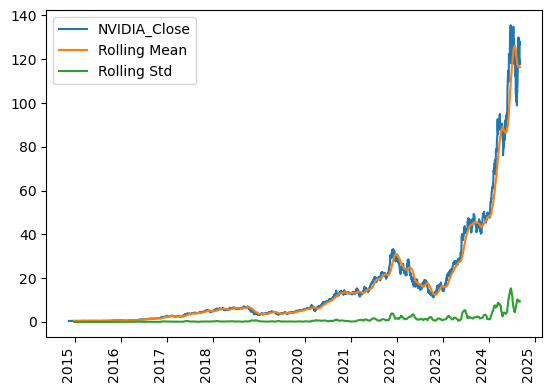

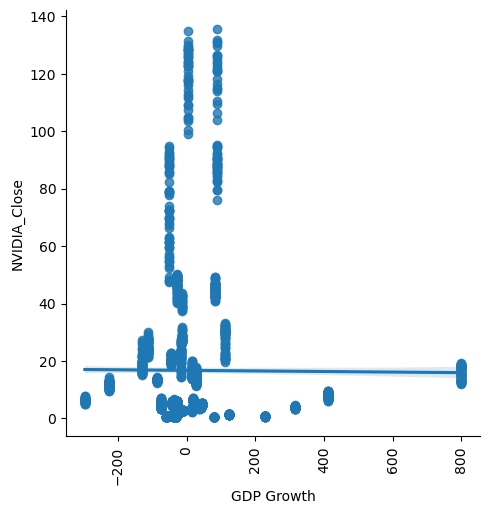

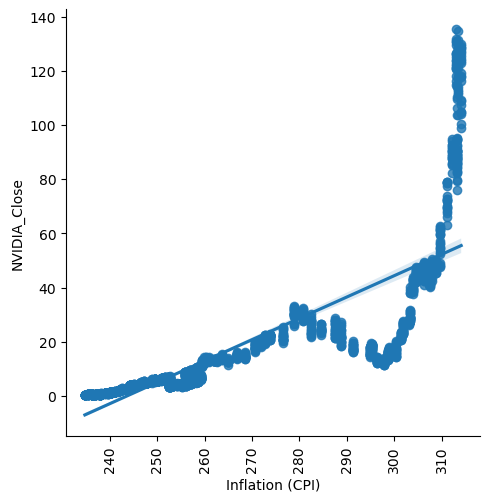

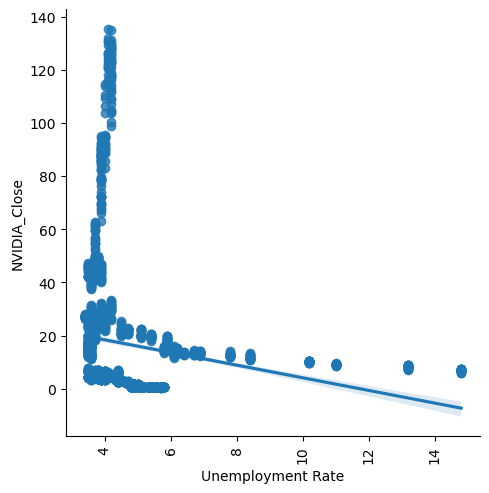

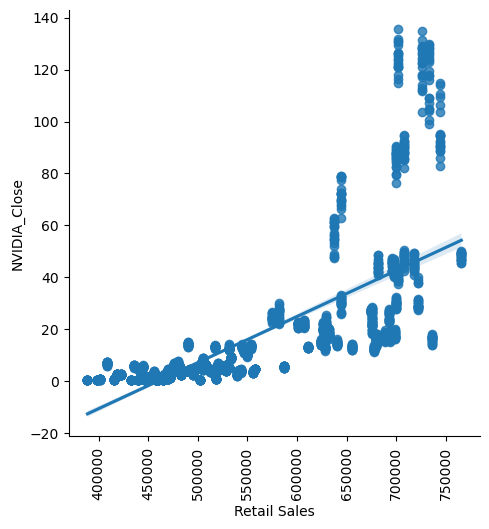

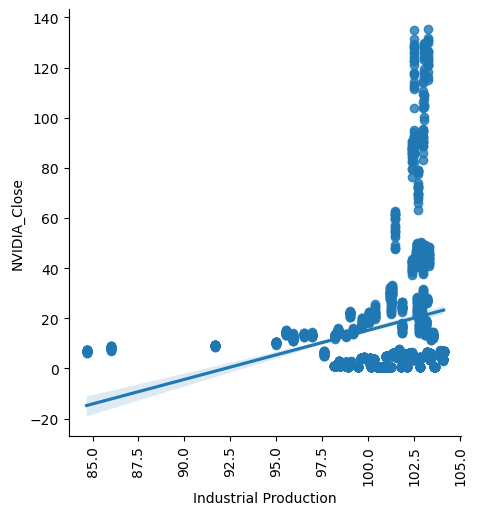

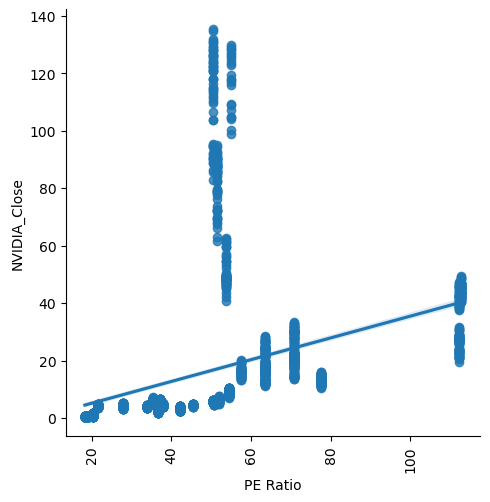

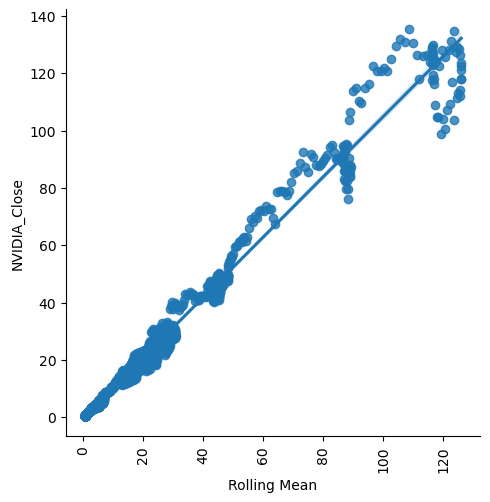

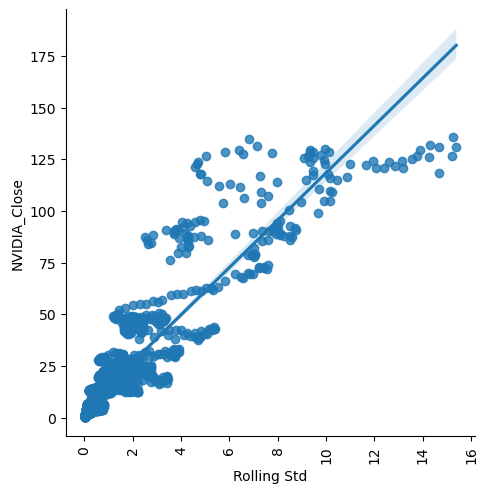

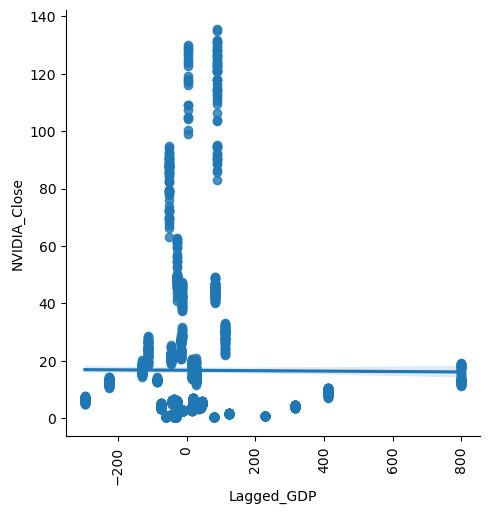

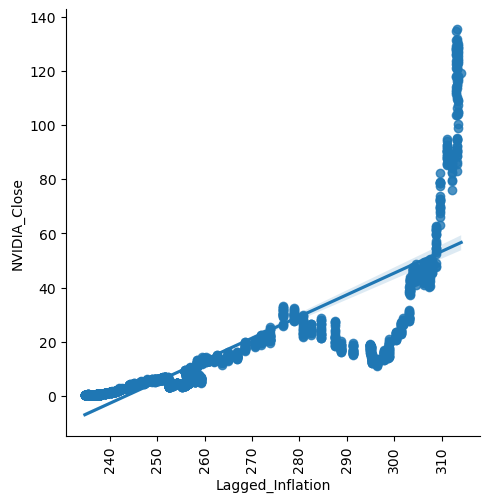

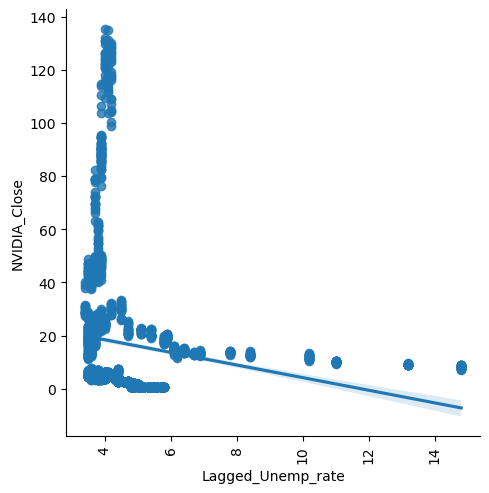

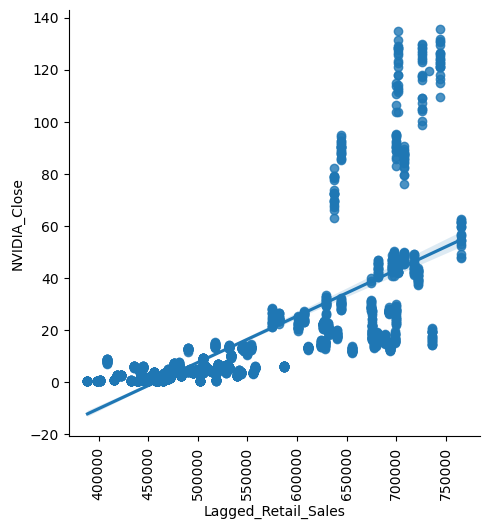

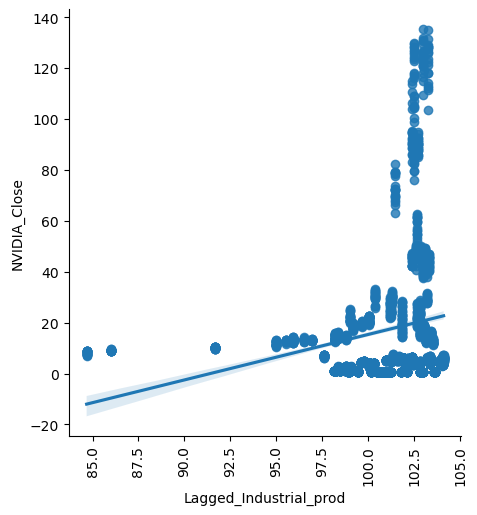

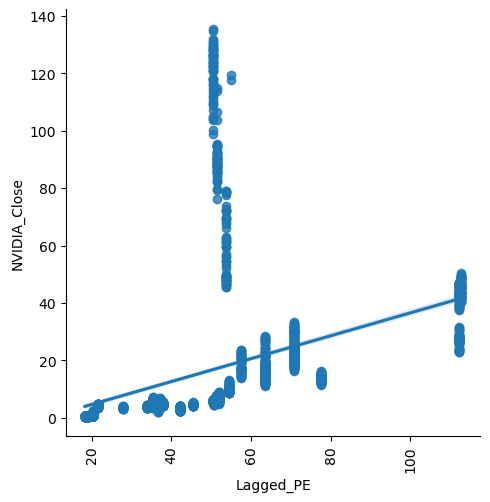

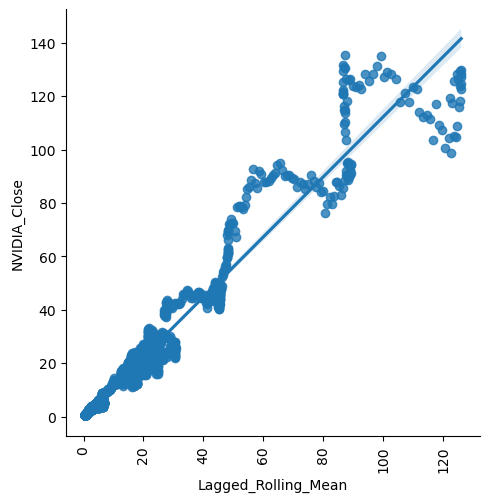

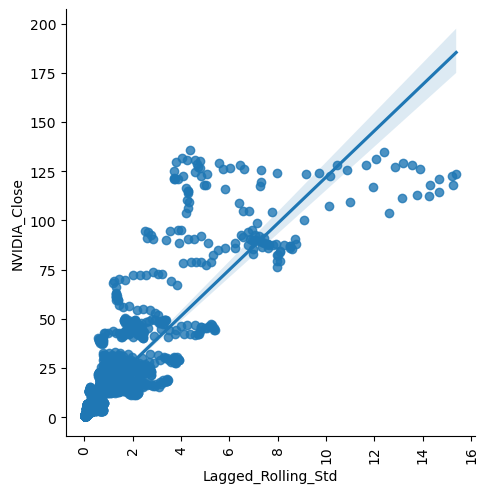

In [24]:
# Draw scatter plots with regression lines

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_reg(col):
    sns.lmplot(x=col, y='NVIDIA_Close', data=final_df_nvidia_close)
    plt.xticks(rotation=90)
    # plt.savefig(f'pairs{col}.png', bbox_inches='tight')

cols = [i for i in final_df_nvidia_close.columns.values.tolist() if i not in ["NVIDIA_Close", "Quarterly EPS", "Lagged_EPS"]]
for col in cols:
    plot_reg(col)

plt.show()

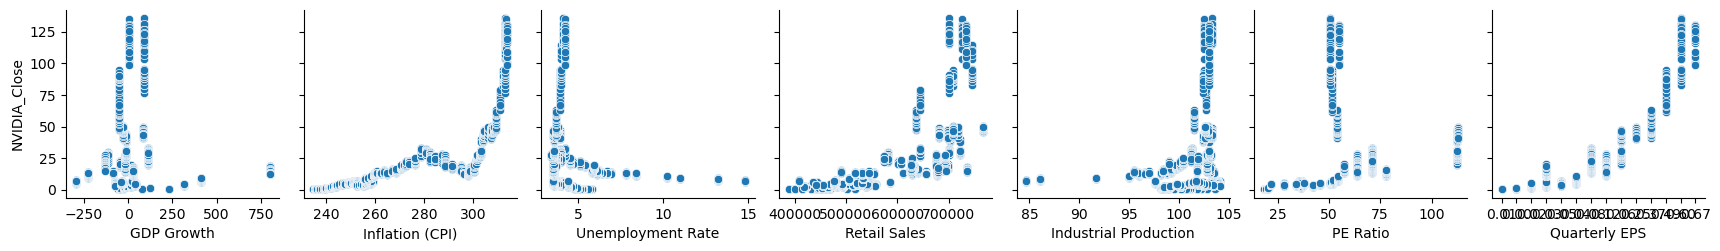

In [25]:
# Plot pair plots

pp = sns.pairplot(data=final_df_nvidia_close,
                  y_vars=['NVIDIA_Close'],
                  x_vars=['GDP Growth', 'Inflation (CPI)', 'Unemployment Rate', 'Retail Sales', 'Industrial Production', 'PE Ratio', 'Quarterly EPS'])

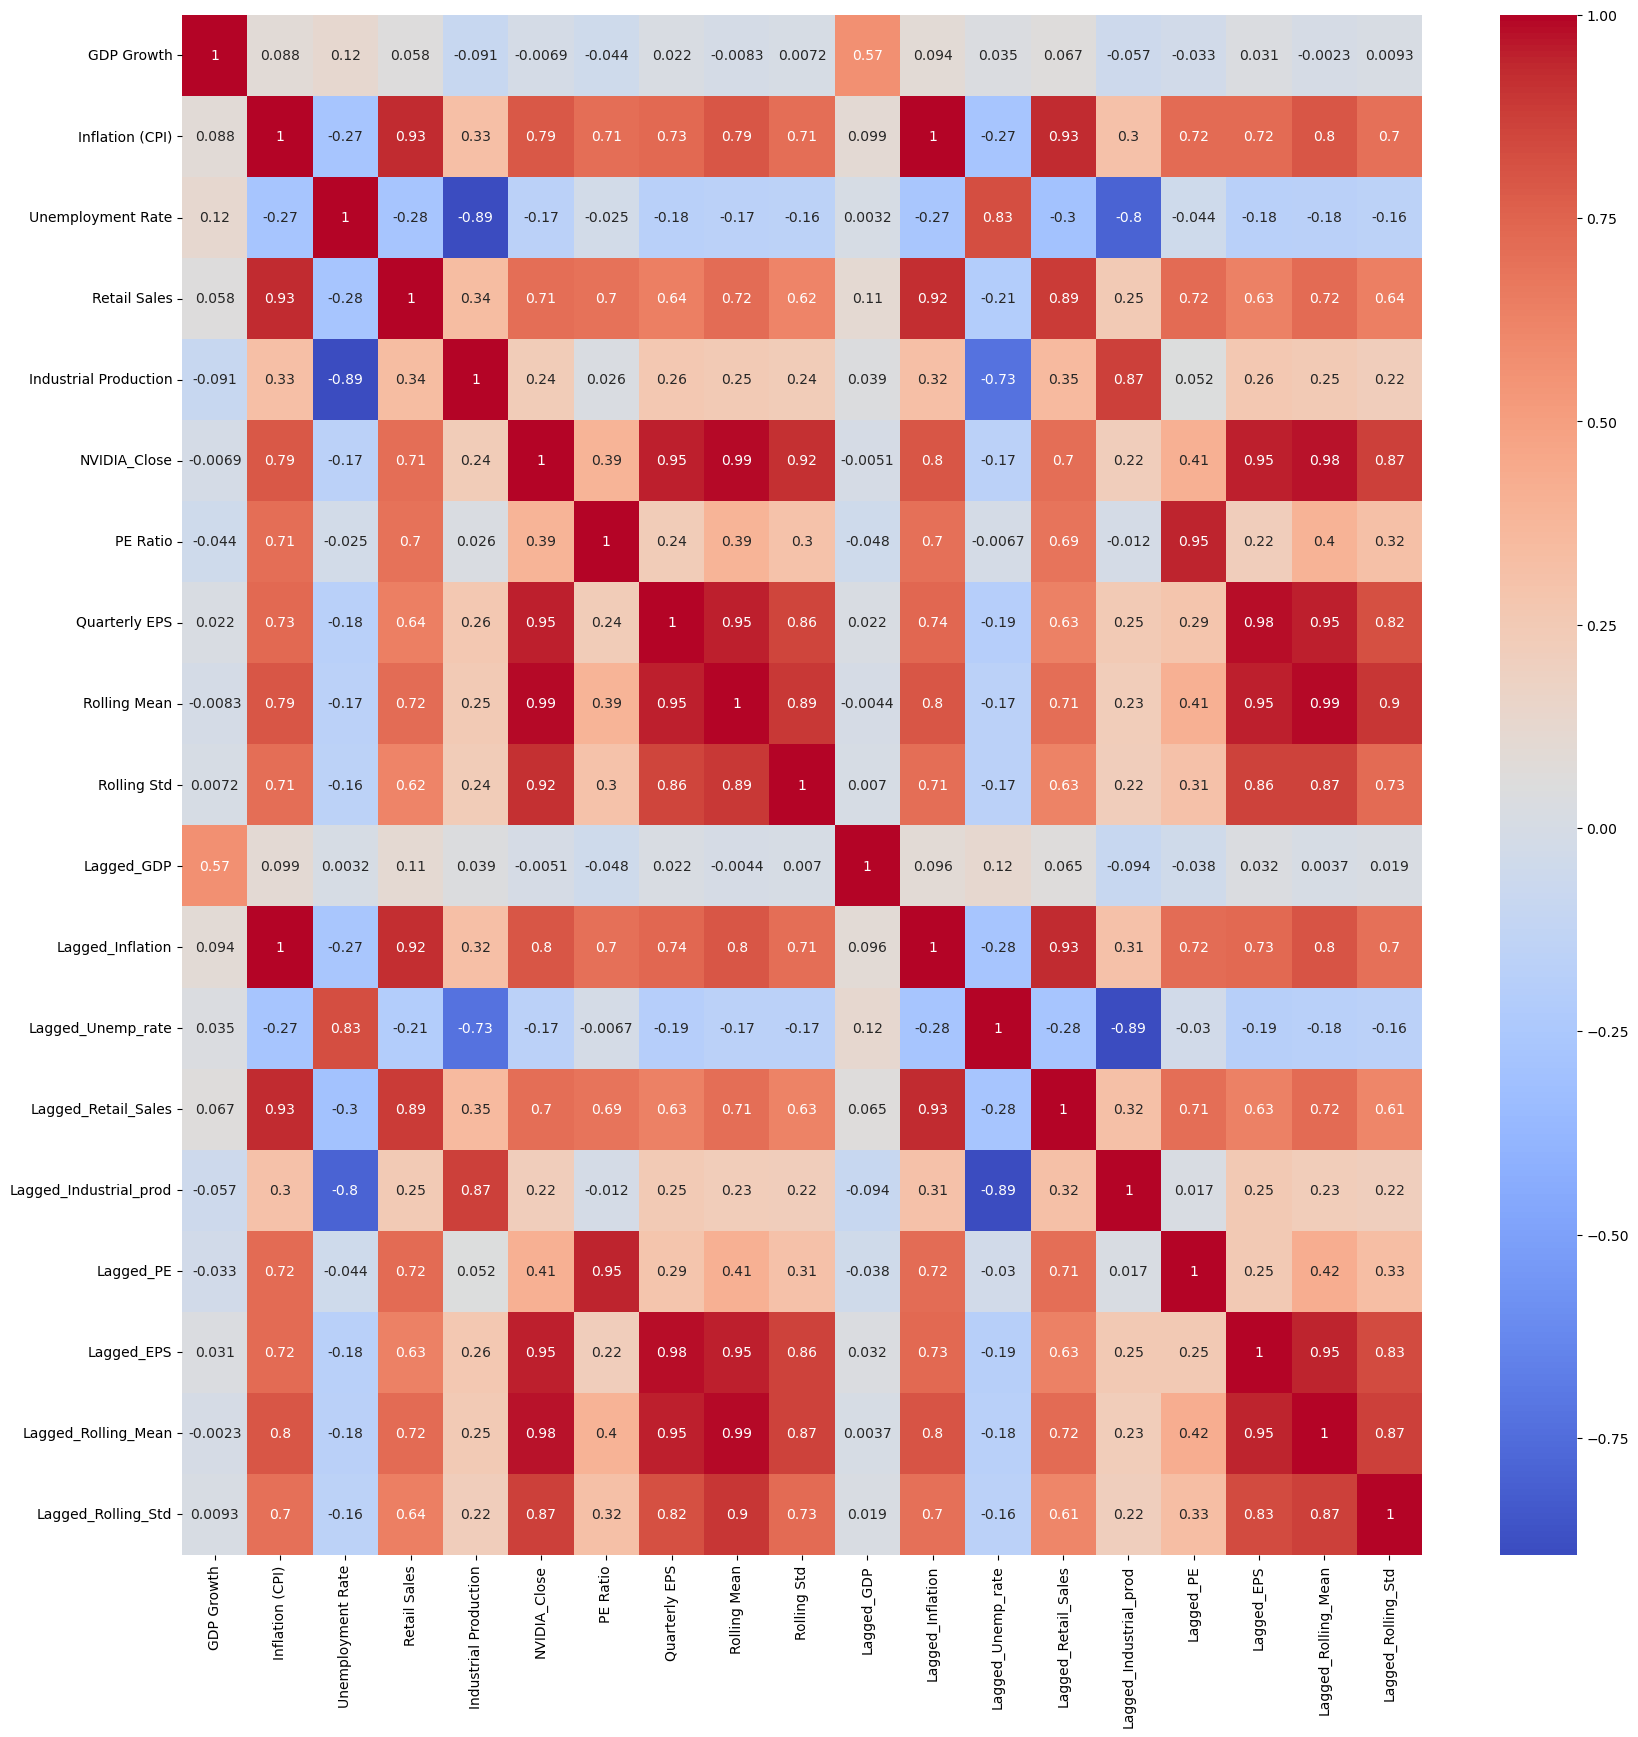

In [26]:
# Plot heatmap
plt.figure(figsize=(20,20))
sns.heatmap(final_df_nvidia_close.corr(), annot=True, cmap='coolwarm')
# plt.savefig('heatmap.png')
plt.show()

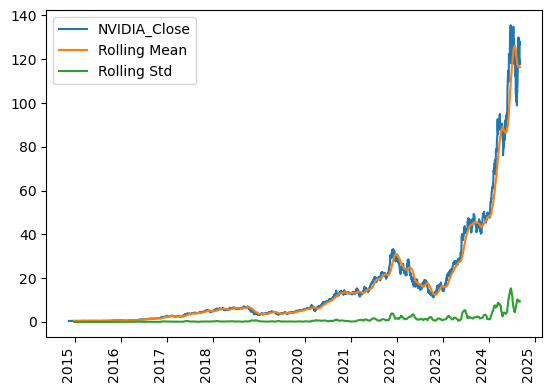

In [27]:
# Plot NVIDIA Closing Price with Rolling Mean and Rolling Std Dev.

final_df_nvidia_close['Rolling Mean'] = final_df_nvidia_close['NVIDIA_Close'].rolling(window=30).mean()
final_df_nvidia_close['Rolling Std'] = final_df_nvidia_close['NVIDIA_Close'].rolling(window=30).std()
final_df_nvidia_close[['NVIDIA_Close', 'Rolling Mean', 'Rolling Std']].plot()
plt.xticks(rotation=90)
#plt.savefig('ma.png', bbox_inches='tight') 
plt.show()

## Train a Linear Regression ML Model by splitting 80% of rows into "Train" set and 20% of rows into "Test" set.

### Calculate best 5 indicators using Recursive Feature Elimination (RFE)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE


cols = ['Lagged_Rolling_Mean', 'Lagged_Unemp_rate', 'Lagged_GDP', 'Lagged_Inflation', 'Lagged_Industrial_prod', 'Lagged_Retail_Sales', 'Lagged_PE', 'Lagged_EPS']


train_size = int(len(final_df_nvidia_close) * 0.8)  # 80% for training
X_train = final_df_nvidia_close[:train_size][cols]
y_train = final_df_nvidia_close[:train_size]['NVIDIA_Close']

X_test = final_df_nvidia_close[train_size:][cols]
y_test = final_df_nvidia_close[train_size:]['NVIDIA_Close']


model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=5)

rfe.fit(X_train, y_train)

# Get the selected features
selected_features = rfe.support_  # Boolean mask for selected features
ranking = rfe.ranking_  # Feature rankings

print("Selected Features:", selected_features)
print("Feature Rankings:", ranking)

Selected Features: [ True  True False  True False False  True  True]
Feature Rankings: [1 1 3 1 2 4 1 1]


### Use the best features to train and test the model and Model Evaluation through different metrics.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

cols = ['Lagged_Rolling_Mean', 'Lagged_Unemp_rate', 'Lagged_Inflation', 'Lagged_PE', 'Lagged_EPS']

X = final_df_nvidia_close[cols]
y = final_df_nvidia_close['NVIDIA_Close']


train_size = int(len(final_df_nvidia_close) * 0.8)  # 80% for training
X_train = final_df_nvidia_close[:train_size][cols]
y_train = final_df_nvidia_close[:train_size]['NVIDIA_Close']

X_test = final_df_nvidia_close[train_size:][cols]
y_test = final_df_nvidia_close[train_size:]['NVIDIA_Close']

# test = final_df_nvidia_close[train_size:]

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

y_pred = linreg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# rmse = root_mean_squared_error(y_test, y_pred)
# print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

y_test = y_test.to_numpy()


# Calculate directional accuracy
actual_directions = np.sign(y_test[1:] - y_test[:-1])
predicted_directions = np.sign(y_pred[1:] - y_pred[:-1])

directional_accuracy = np.mean(actual_directions == predicted_directions)

print(f"Directional Accuracy: {directional_accuracy * 100:.2f}%")

linear model coeff (w): [ 0.88537666  0.17205908 -0.00620693  0.04718728  0.27233348]
linear model intercept (b): -0.215
R-squared score (training): 0.945
R-squared score (test): 0.779
0.7794413158381037
Mean Absolute Error (MAE): 11.162752453450736
Mean Squared Error (MSE): 271.77074101450677
Mean Absolute Percentage Error (MAPE): 0.19501569034256266
Directional Accuracy: 51.32%


# Train an Advanced Neural Network ML Model

In [23]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Step 2: Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network Regressor with L2 regularization (alpha parameter)
mlp_regressor = MLPRegressor(max_iter=2000, learning_rate_init = 0.01, random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(3,), (4,), (5,)],  # Number of neurons in each hidden layer
    'activation': ['relu', 'tanh', 'logistic'],    # Activation function
    'solver': ['adam', 'lbfgs', 'sgd'],                   # Optimization algorithm
    'alpha': [1e-7, 1e-6, 1e-5],                # L2 regularization term (higher = more regularization)
    'learning_rate': ['constant', 'adaptive'],     # Learning rate schedule
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=mlp_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the best model
print(f"Best hyperparameters: {grid_search.best_params_}")
best_mlp_model = grid_search.best_estimator_

# Predict on the test set
y_pred6= best_mlp_model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred6)
print(f"Mean Squared Error on Test Set: {mse:.4f}")

# Calculate R-sq
r2 = r2_score(y_test, y_pred6)
print(r2)

/opt/anaconda3/envs/rohit-capstone-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/envs/rohit-capstone-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/envs/rohit-capstone-env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: Conv

Best hyperparameters: {'activation': 'relu', 'alpha': 1e-07, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant', 'solver': 'sgd'}
Mean Squared Error on Test Set: 261.0507
0.788141269947175
